In [1]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt 

%matplotlib inline

In [2]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_csv(url, sep='\t')

In [3]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


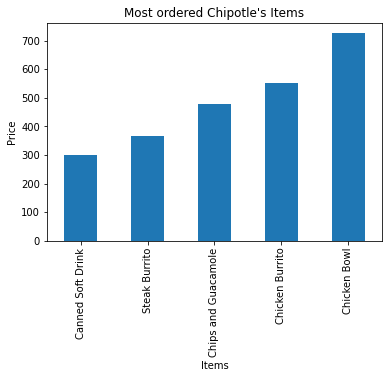

In [4]:
#Create a histogram of the top 5 items bought

x = chipo.item_name

letter_counts = Counter(x)

df = pd.DataFrame.from_dict(letter_counts, orient='index')

df = df[0].sort_values(ascending = True)[45:50]

df.plot(kind='bar')

plt.xlabel('Items')
plt.ylabel('Price')
plt.title('Most ordered Chipotle\'s Items')

plt.show()

(0.0, 36.7)

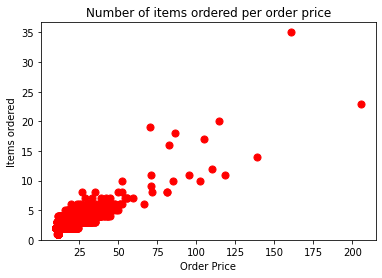

In [5]:
#Create a scatterplot with the number of items orderered per order price

chipo.item_price = [float(value[1:-1]) for value in chipo.item_price]

orders = chipo.groupby('order_id').sum()

plt.scatter(x = orders.item_price, y = orders.quantity, s = 50, c = 'red')

plt.xlabel('Order Price')
plt.ylabel('Items ordered')
plt.title('Number of items ordered per order price')
plt.ylim(0)

In [7]:
#BONUS: Create a question and a graph to answer your own question.

chipo.shape

(4622, 5)

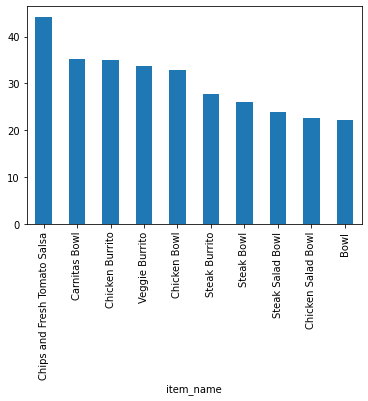

In [35]:
chipo_high_price = chipo.groupby('item_name').item_price.max().sort_values(ascending=False)[:10].plot(kind='bar')

In [15]:
chipo_high_price

item_name
Chips and Fresh Tomato Salsa             44.25
Carnitas Bowl                            35.25
Chicken Burrito                          35.00
Veggie Burrito                           33.75
Chicken Bowl                             32.94
Steak Burrito                            27.75
Steak Bowl                               26.07
Steak Salad Bowl                         23.78
Chicken Salad Bowl                       22.50
Bowl                                     22.20
Chicken Soft Tacos                       21.96
Carnitas Burrito                         18.50
Steak Soft Tacos                         18.50
Barbacoa Crispy Tacos                    18.50
Carnitas Crispy Tacos                    17.98
Steak Crispy Tacos                       17.98
Chips and Guacamole                      17.80
Chicken Crispy Tacos                     17.50
Veggie Soft Tacos                        16.98
Veggie Bowl                              16.98
Bottled Water                            15.00
Sid

In [16]:
import plotly.express as px

data_pl = px.data.gapminder()

In [37]:
fig = px.bar(data_frame=chipo, x='item_name', y='item_price')

In [23]:
fig.show()

In [46]:
import plotly.graph_objects as go

In [53]:
fig = go.Figure(data=[go.bar(x = chipo['item_name'], y = chipo['item_price'])])

TypeError: ignored

In [58]:
fig2 = go.Figure(
    data=[go.Bar(x=chipo.item_name[:10], y=chipo.item_price[:10])],
    layout=go.Layout(height=600, width=800)
)

In [59]:
fig2.show()